In [149]:
import pandas as pd

housing= pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0)
ames_real_estate_data = pd.read_csv('Ames_Real_Estate_Data.csv', index_col=0)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [89]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [90]:
ames_real_estate_data.head()

,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
MapRefNo,,,,,,,,,,,,,,,,,,,,,
520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4599,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4507,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4513,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,ASSOCIATION COMMON AREA,...,3449,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4506,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [150]:
data = pd.read_csv("addr_final_joined.csv", index_col=0)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9,74,76,87,88,89,114,115,118,119,162,166,167) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
txt = open("addr_final_joined.csv", "r")
lines = txt.readlines()
txt.close()

In [6]:
lines = list(map(lambda x: str.strip(x), lines))

In [7]:
import re
refcolumns = list(map(lambda x: re.search(r'^[^|]*', x)[0], lines))

In [8]:
#lines

In [9]:
#data['B11016e4']

In [10]:
l=[]
for i in data.columns:
    if i in refcolumns:
        l.append(1)
    else:
        l.append(0)
sum(l)

1861

In [11]:
# data_deduped = data.groupby('GEOID10').agg('mean')
# data_deduped.head()

In [17]:
#which demo groups have high variations in sales prices?
import numpy as np

# variances = {}

# for x in refcolumns:
#     colname = str(x)
#     if colname in data_deduped.columns:
#         if type(data_deduped[colname][1]) == np.int64:
#             variances[colname] = data_deduped[colname].var()

# #which demo groups have linear correlations to sales price?

In [18]:
demo_variances = pd.DataFrame(columns = ['Demo','Variance'])
demo_variances['Demo'] = variances.keys()
demo_variances['Variance'] = [x - np.mean(list(variances.values())) / np.std(list(variances.values())) for x in variances.values()]

In [19]:
demo_variances = demo_variances[demo_variances.Variance>0]
demo_variances.sort_values(by='Variance')

,Demo,Variance


In [20]:
[i for i in lines if 'B25077m1' in i]

['B25077m1|MEDIAN VALUE (DOLLARS) - Universe:  Owner-occupied housing units - Median value (dollars) -- (Margin of Error)']

In [21]:
np.mean(list(variances.values()))

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [22]:
np.std(list(variances.values()))

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

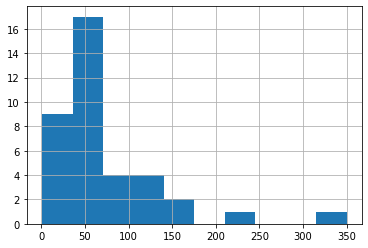

In [23]:
how_many_homes_in_cblocks = data.groupby('GEOID10').agg({'PID' : 'count'}).sort_values(by='PID')
how_many_homes_in_cblocks['PID'].hist()

In [ ]:
#######lets look into the demo data#########

#### 1) Age
#### 2) Income
#### 3) Race

In [151]:
### youth = data[['B01001e7','B01001e8','B01001e9','B01001e10','B01001e31','B01001e32','B01001e33','B01001e34']].sum(axis=1)
# tot_pop = ['B01001e1']
data = data.drop_duplicates(subset=['PID'])

data['age_18_24'] = data[['B01001e7','B01001e8','B01001e9','B01001e10','B01001e31','B01001e32','B01001e33','B01001e34']].sum(axis=1) / data['B01001e1']
data['is_collegetown'] = np.where(data['age_18_24'] >= 0.2, 1, 0)
data['is_collegetown'].value_counts()


##split the df into college kid neighborhoods (solo_cups), and adults (old_people)
solo_cups = data.loc[data['is_collegetown'] == 1]
old_people = data.loc[data['is_collegetown'] == 0]

print(old_people.shape)
print(solo_cups.shape)

(1900, 2056)
(629, 2056)


In [126]:
1900 + 629

2529

In [152]:
age_18_24 = data[['age_18_24','is_collegetown','PID']]

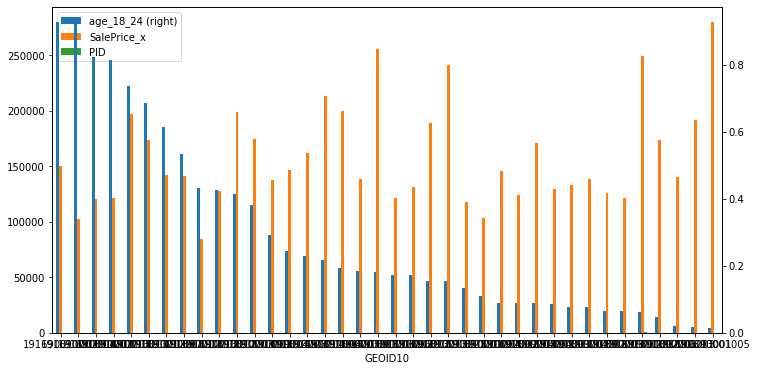

In [153]:
import matplotlib as plt

#youth_in_cblocks = data.groupby(['Neighborhood_x']).agg({'age_18_24':'mean', 'SalePrice_x':'mean', 'PID': 'count'}).sort_values(by='age_18_24', ascending=False)
youth_in_cblocks = data.groupby(['GEOID10']).agg({'age_18_24':'mean', 'SalePrice_x':'mean', 'PID': 'count'}).sort_values(by='age_18_24', ascending=False)
youth_in_cblocks.index = youth_in_cblocks.index.astype(str)
youth_in_cblocks.plot(kind='bar' , secondary_y='age_18_24' , rot=0, figsize=(12,6))

In [154]:
# youth_in_cblocks = youth_in_cblocks[youth_in_cblocks.PID > 10]
# youth_in_cblocks = youth_in_cblocks[youth_in_cblocks.PID < 200]
youth_in_cblocks.head()

,age_18_24,SalePrice_x,PID
GEOID10,,,
191690011002,0.927585,150000.000000,2
191690007004,0.924827,102250.000000,4
191690011001,0.824962,120376.000000,25
191690007003,0.814851,121300.000000,8
191690013013,0.736099,197453.220779,77


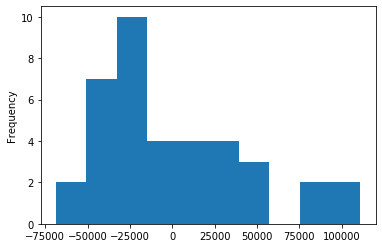

In [155]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(youth_in_cblocks.age_18_24).reshape(-1,1)
y = youth_in_cblocks.SalePrice_x

lm = LinearRegression()
lm.fit(x, y)
residuals = y - lm.predict(x)
residuals.plot(kind ='hist')

In [156]:
print('R^2 is equal to %.3f' %(lm.score(x,y)))
#print('RSS is equal to %.3f' %(np.sum((x-lm.predict(y))**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slope is %s' %(lm.coef_))

R^2 is equal to 0.053
The intercept is 169347.486
The slope is [-38230.24055431]


In [157]:
### There does not seem to be a simple linear relationship between young people and salesprices

In [158]:
race = ({'B02001e1' : 'total',
         'B02001e2' : 'white',
         'B02001e3' : 'black',
         'B02001e4' : 'native_am',
         'B02001e5' : 'asian',
         'B02001e6' : 'nhopi',
         'B02001e7' : 'other',
         'B02001e8' : 'bi_racial',
         'B03002e12' : 'hispanic'    
})

data = data.rename(columns=race)

a = list(race.values())
b = ['GEOID10', 'SalePrice_x','PID']

race_demo = data[a+b]

In [159]:
race_demo['white'] = race_demo['white'] / race_demo['total']
race_demo['black'] = race_demo['black'] / race_demo['total']
race_demo['native_am'] = race_demo['native_am'] / race_demo['total']
race_demo['asian'] = race_demo['asian'] / race_demo['total']
race_demo['nhopi'] = race_demo['nhopi'] / race_demo['total']
race_demo['other'] = race_demo['other'] / race_demo['total']
race_demo['bi_racial'] = race_demo['bi_racial'] / race_demo['total']
race_demo['hispanic'] = race_demo['hispanic'] / race_demo['total']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [160]:
race_demo2 = race_demo.groupby('GEOID10').agg({'mean'}).drop('PID', axis=1)
race_demo2

,total,white,black,native_am,asian,nhopi,other,bi_racial,hispanic,SalePrice_x
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
GEOID10,,,,,,,,,,
191690001002,2985,0.880067,0.002680,0.000000,0.083082,0.0,0.000000,0.034171,0.015075,249807.192073
191690001004,766,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,103000.000000
191690001005,933,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.042872,279888.888889
191690001006,3378,0.787448,0.028419,0.000000,0.182356,0.0,0.000000,0.001776,0.007697,255909.064655
191690002001,889,0.971879,0.000000,0.000000,0.028121,0.0,0.000000,0.000000,0.000000,173318.360656
191690002002,1168,0.994007,0.000000,0.000000,0.005993,0.0,0.000000,0.000000,0.033390,145446.709091
191690002003,1163,0.889080,0.104041,0.000000,0.000000,0.0,0.000000,0.006879,0.027515,126140.186916
191690003001,1059,0.976393,0.000000,0.000000,0.023607,0.0,0.000000,0.000000,0.041549,191314.673913


In [161]:
race_demo2.corr()

,,total,white,black,native_am,asian,nhopi,other,bi_racial,hispanic,SalePrice_x
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
total,mean,1.000000,-0.263234,0.076834,-0.166775,0.262255,NaN,0.123767,-0.045479,0.043108,0.383219
white,mean,-0.263234,1.000000,-0.528471,-0.000335,-0.748073,NaN,-0.343859,-0.146827,-0.396678,0.082620
black,mean,0.076834,-0.528471,1.000000,-0.010368,-0.123233,NaN,0.303962,-0.102969,0.474741,-0.001573
native_am,mean,-0.166775,-0.000335,-0.010368,1.000000,-0.122937,NaN,0.167399,0.223747,-0.041215,-0.099375
asian,mean,0.262255,-0.748073,-0.123233,-0.122937,1.000000,NaN,0.025954,0.072936,0.085416,-0.079637
nhopi,mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other,mean,0.123767,-0.343859,0.303962,0.167399,0.025954,NaN,1.000000,-0.131644,0.296893,-0.004218
bi_racial,mean,-0.045479,-0.146827,-0.102969,0.223747,0.072936,NaN,-0.131644,1.000000,-0.004757,-0.074811
hispanic,mean,0.043108,-0.396678,0.474741,-0.041215,0.085416,NaN,0.296893,-0.004757,1.000000,-0.163700


In [162]:
features = race_demo2[['black', 'native_am', 'asian', 'other', 'bi_racial', 'hispanic']]
price = race_demo2['SalePrice_x']

features.head()

,black,native_am,asian,other,bi_racial,hispanic
,mean,mean,mean,mean,mean,mean
GEOID10,,,,,,
191690001002,0.002680,0.0,0.083082,0.0,0.034171,0.015075
191690001004,0.000000,0.0,0.000000,0.0,0.000000,0.000000
191690001005,0.000000,0.0,0.000000,0.0,0.000000,0.042872
191690001006,0.028419,0.0,0.182356,0.0,0.001776,0.007697
191690002001,0.000000,0.0,0.028121,0.0,0.000000,0.000000


0.053761858861418044
coeficients: [[   59888.29039829 -1348437.56706024   -41944.40456521   182657.5970178
    -96322.29380398  -311370.36867002]]
intercept: [169302.10031596]


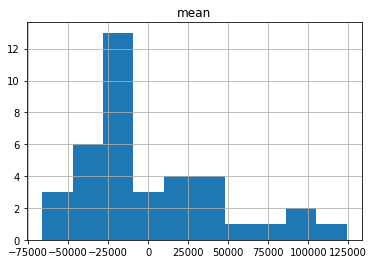

In [163]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(features, price)
residuals = price - lm.predict(features)
residuals.hist()

print(lm.score(features, price))
print('coeficients:' ,lm.coef_)
print('intercept:' ,lm.intercept_)

In [164]:
##no significance between race and avg sales price alone

In [177]:
lines

['Short Name|Full Name',
 'STATEFP10|State FIPS Code',
 'COUNTYFP10|County FIPS Code',
 'TRACTCE10|Census Tract Code',
 'BLKGRPCE10|Block Group Code',
 'GEOID10|Geographic Identifier',
 'NAMELSAD10|Full Name',
 'MTFCC10|MAF/TIGER Feature Classification Code (G5030 = Block Group)',
 'FUNCSTAT|Functional Status (S = Statistical)',
 'ALAND10|Land Area (square meters)',
 'AWATER10|Water Area (square meters)',
 'INTPTLAT10|Internal Point Latitude',
 'INTPTLON10|Internal Point Longitude',
 'geo_id|Unique Identifier of Summary Level, Characteristic Iteration, US, State, County, Tract, Block Group Code',
 'GEOID|Unique Identifier of Summary Level, Characteristic Iteration, US, State, County, Tract, Block Group Code',
 'B01001e1|SEX BY AGE - Universe:  Total population - Total: -- (Estimate)',
 'B01001m1|SEX BY AGE - Universe:  Total population - Total: -- (Margin of Error)',
 'B01001e2|SEX BY AGE - Universe:  Total population - Total:  Male: -- (Estimate)',
 'B01001m2|SEX BY AGE - Universe:  T

In [165]:
income = ({'B17017e2' : 'below_poverty_level',
           'B19001e1' : 'income_total',
           'B19001e2' : '<10k',
           'B19001e3' : '10k_to_15k',
           'B19001e4' : '15k_to_20k',
           'B19001e5' : '20k_to_25k',
           'B19001e6' : '25k_to_30k',
           'B19001e7' : '30k_to_35k',
           'B19001e8' : '35k_to_40k',
           'B19001e9' : '40k_to_45k',
           'B19001e10' : '45k_to_50k',
           'B19001e11' : '50k_to_60k',
           'B19001e12' : '60k_to_75k',
           'B19001e13' : '75k_to_100k',
           'B19001e14' : '100k_to_125k',
           'B19001e15' : '125k_to_150k',
           'B19001e16' : '150k_to_200k',
           'B19001e17' : '>200k',
           'B19013e1' : 'median_hh_income',
          })

In [166]:
data = data.rename(columns=income)

In [188]:
data.groupby('GEOID10').agg({'median_hh_income' : 'mean', 'age_18_24' : 'mean'})
#data['age_18_24']

,median_hh_income,age_18_24
GEOID10,,
191690001002,88821,0.060637
191690001004,72857,0.110966
191690001005,113828,0.013934
191690001006,77028,0.181764
191690002001,56324,0.046119
191690002002,59219,0.089897
191690002003,46755,0.065348
191690003001,91289,0.017941
191690003002,39306,0.173579


In [167]:
a = list(income.values())
b = ['GEOID10', 'SalePrice_x','PID']
income_demo = data[a+b]
data[a+b].groupby('GEOID10').agg(['mean']).head()

,below_poverty_level,income_total,<10k,10k_to_15k,15k_to_20k,20k_to_25k,25k_to_30k,30k_to_35k,35k_to_40k,40k_to_45k,...,50k_to_60k,60k_to_75k,75k_to_100k,100k_to_125k,125k_to_150k,150k_to_200k,>200k,median_hh_income,SalePrice_x,PID
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
GEOID10,,,,,,,,,,,,,,,,,,,,,
191690001002,57,1087,11,11,35,12,19,31,45,28,...,124,85,261,161,85,48,78,88821,249807.192073,5.278358e+08
191690001004,36,318,12,24,12,13,27,25,9,0,...,20,35,56,17,48,20,0,72857,103000.000000,1.007100e+09
191690001005,0,379,0,0,0,0,11,0,0,19,...,16,19,88,74,53,16,70,113828,279888.888889,5.328649e+08
191690001006,225,1534,155,60,56,87,30,0,89,29,...,40,95,324,211,43,178,97,77028,255909.064655,5.304554e+08
191690002001,11,478,11,0,53,12,9,25,26,57,...,25,60,59,49,6,41,16,56324,173318.360656,5.325999e+08


In [168]:
income_demo['below_poverty_level'] = income_demo['below_poverty_level'] / income_demo['income_total']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [169]:
income_demo = income_demo[['below_poverty_level','median_hh_income','SalePrice_x','PID']].drop_duplicates()

In [170]:
features = income_demo[['below_poverty_level','median_hh_income']]
price = income_demo['SalePrice_x']

error: 0.7412
coeficients: [2.12580238e+05 2.53215796e+00]
intercept: -4026.3587305360998


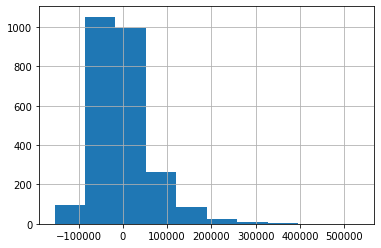

In [171]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(features, price)
residuals = price - lm.predict(features)
residuals.hist()

print('error: %.4f'  %(1-lm.score(features, price)))
print('coeficients:' ,lm.coef_)
print('intercept:' ,lm.intercept_)

In [ ]:
#some correlation between median income, poverty level, and saleprice

In [172]:
race_demo = race_demo.drop('SalePrice_x', axis=1).drop('GEOID10', axis=1)
income_demo = income_demo.drop('SalePrice_x', axis=1)

In [173]:
#create df with relevant columns and new features like income, race, and age
housing = housing.merge(age_18_24, on='PID').merge(race_demo, on='PID').merge(income_demo, on='PID')

In [176]:
housing.to_csv('housing_w_demo_features.csv')

In [49]:
h2 = housing.copy()

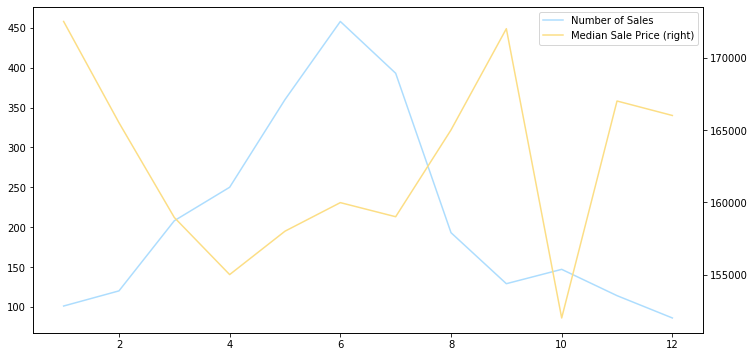

In [239]:
#seasonality of sales, manipulating MoSold and YrSold
#h2.groupby(['MoSold']).agg({'SalePrice' : ['count','median']}).plot(secondary_y=['SalePrice, median'])
#h2.groupby(['MoSold']).agg({'SalePrice' : 'median'}).plot()

seasonality = h2.groupby(['MoSold']).agg({'SalePrice' : ['count','median']})
seasonality.index = list(map(lambda x: int(x),seasonality.index))
seasonality = seasonality.sort_index(axis=0)
seasonality.columns = ['Number of Sales', 'Median Sale Price']
#seasonality['Median Sale Price'] = np.log(seasonality['Median Sale Price'])
#seasonality['Number of Sales'] = np.log10(seasonality['Number of Sales'])
seasonality.plot(secondary_y=['Median Sale Price'], color=['#ADDDFE', '#FCDE85'],
                                  figsize=(12,6), xscale)

In [60]:
h3 = pd.DataFrame()
h3['year'] = h2['YrSold']
h3['month'] = h2['MoSold']
h3['day'] = 1
h3['SalePrice'] = h2['SalePrice']

In [62]:
h3['DateSold'] = pd.to_datetime(h3[['year','month','day']])
#h3 = h3.drop(['MoSold', 'YrSold','total'], axis=1)

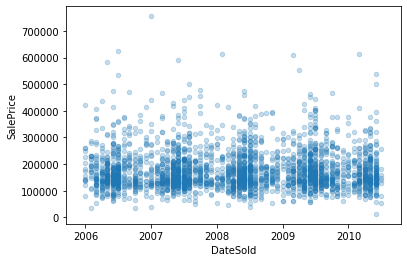

In [63]:
h3[['DateSold','SalePrice']].plot(kind='scatter', x='DateSold', y='SalePrice',alpha=.25)

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

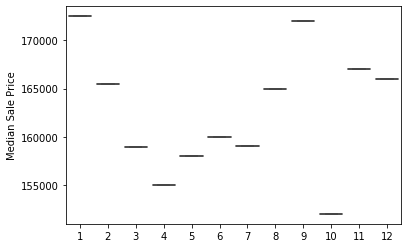

In [242]:
#plt.figure(figsize=(12,6))
sns.boxplot(x=seasonality.index, y='Median Sale Price', data=seasonality)

In [ ]:
##looks like theres not much variation between months in terms of sales price, indicating low seasonality in price
##however, there are months where more houses are sold, which seems to be spring/summer

In [ ]:
#continuing feature selection using lasso

In [117]:
housing['LotFrontage'] = housing['LotFrontage'].fillna(0)
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)
housing['GarageCars'] = housing['GarageCars'].fillna(0)
housing['GarageArea'] = housing['GarageArea'].fillna(0)
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna('None')
housing['GarageFinish'] = housing['GarageFinish'].fillna('None')
housing['GarageType'] = housing['GarageType'].fillna('None')
housing['GarageQual'] = housing['GarageQual'].fillna('None')
housing['GarageCond'] = housing['GarageCond'].fillna('None')
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('None')
housing['BsmtCond'] = housing['BsmtCond'].fillna('None')
housing['BsmtQual'] = housing['BsmtQual'].fillna('None')
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('None')
housing['TotalBath'] = housing['FullBath'] + (housing['HalfBath']*.5)
housing['BsmtFullBath'] = housing['BsmtFullBath'].fillna(0)
housing['BsmtFinSF1'] = housing['BsmtFinSF1'].fillna(0)
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('Unf')
housing['BsmtUnfSF'] = housing['BsmtUnfSF'].fillna(0)
housing['TotalBsmtSF'] = housing['TotalBsmtSF'].fillna(0)
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('None')
housing = housing.drop(labels= ['PoolQC', 'MiscFeature', 'Alley', 'Fence','BsmtHalfBath', 'YrSold', 'MoSold',
                                'FullBath','HalfBath', 'Condition2', 'BsmtFinSF2','Electrical', 'Utilities',
                                'RoofStyle', 'RoofMatl','MasVnrArea', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2',
                               'BsmtFinType2',  'Heating', 'GarageYrBlt', 'SaleCondition',
                               'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'], axis=1)

In [66]:
y = housing['SalePrice']
housing = housing.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'BsmtHalfBath', 
                       'BsmtFullBath','FullBath', 'HalfBath', 'Condition2', 
                       'BsmtFinSF2','Electrical', 'PID', 'SalePrice'], axis=1)
X = pd.get_dummies(housing, drop_first=True, dummy_na=True)

In [67]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [81]:
R2_ridge = []
alphaRange = np.linspace(1e-4,200,20)
for alpha in alphaRange:
    ridge.set_params(alpha=alpha, normalize=False)  
    ridge.fit(X_train, y_train)
    R2_ridge.append(ridge.score(X_train, y_train))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.09706e-16): result may not be accurate.
  overwrite_a=True).T


In [77]:
R2_lasso = []
alphaRange = np.linspace(1e-4,200,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize=False)  
    lasso.fit(X_train, y_train)
    R2_lasso.append(lasso.score(X_train, y_train))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339953356319.82416, tolerance: 1091906371.530548
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327905294562.97327, tolerance: 1091906371.530548
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 349629254189.5331, tolerance: 1091906371.530548
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

In [82]:
list(zip(R2_lasso, R2_ridge))

[(0.937732289554355, 0.9377333358575979),
 (0.9351478665595833, 0.9312018324544326),
 (0.9330778147361798, 0.9275335549383144),
 (0.9314706050059522, 0.9247445891970105),
 (0.9299155313401625, 0.9224702810995001),
 (0.928457723940214, 0.9205447209207729),
 (0.9273209828990945, 0.9188736948376212),
 (0.9262708211009554, 0.9173972773135012),
 (0.9252981540744486, 0.9160745835596412),
 (0.9243054969732509, 0.9148763337016275),
 (0.9232987851852325, 0.9137807903106888),
 (0.9222509161551359, 0.9127713568263454),
 (0.9212317142177846, 0.9118350724305379),
 (0.9202034256731653, 0.9109616249900938),
 (0.9192099985169735, 0.9101426797312001),
 (0.9181714787633879, 0.9093714087313906),
 (0.9171499317963723, 0.9086421527210649),
 (0.9162195440930975, 0.907950172682988),
 (0.9153096938198604, 0.9072914639640691),
 (0.9144485424844989, 0.9066626148725873)]

In [118]:
##write housing to csv to easily check colinearity in R using VIF function:
housing_all = pd.get_dummies(housing, drop_first=True, dummy_na=True)

housing_all.to_csv('housing_added_features.csv')

In [123]:
housing_all.head()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleType_nan
0,909176150,856,126000,30,0.0,7890,6,6,1939,1950,...,0,0,0,0,0,0,0,0,1,0
1,905476230,1049,139500,120,42.0,4235,5,5,1984,1984,...,0,0,0,0,0,0,0,0,1,0
2,911128020,1001,124900,30,60.0,6060,5,9,1930,2007,...,0,0,0,0,0,0,0,0,1,0
3,535377150,1039,114000,70,80.0,8146,4,8,1900,2003,...,0,0,0,0,0,0,0,0,1,0
4,534177230,1665,227000,60,70.0,8400,8,6,2001,2001,...,0,0,0,0,0,0,0,0,1,0
